<a href="https://colab.research.google.com/github/GAKIZAB/Projet-Machine-learning-avec-Python/blob/main/Pr%C3%A9diction%20et%20selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projet : Prédiction de la popularité des articles**
# **Introduction**
Dans ce projet, nous nous intéressons à la prédiction de la popularité d’articles en nous basant sur leurs métadonnées. L’objectif est de développer un modèle de machine learning capable de prédire, avec précision, le niveau de popularité d’un article à partir des informations descriptives qui lui sont associées.

L'objectif est double : (1) explorer les données pour comprendre les relations entre les variables et (2) comparer différentes méthodes de prédiction en intégrant des techniques de réduction de dimension. Enfin, nous examinerons la sélection et l'influence des variables pour affiner nos prédictions.

# **1. Chargement et préparation de données réelles**

## **1.1 Chargement des Données**



In [15]:
# importattion des données
import pandas as pd

data = pd.read_csv('OnlineNewsPopularity.csv')
data.head(3)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000,1500


In [3]:
data.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

Notre metadonnées contient:

1) 1 variables qualitative :

  url : URL de l’article

2) 45 variable quantitative :

  - timedelta : Jours entre la publication de l’article et l’acquisition du jeu de données
  - n_tokens_title : Nombre de mots dans le titre
  - n_tokens_content : Nombre de mots dans le contenu
  - n_unique_tokens : Taux de mots uniques dans le contenu
  - n_non_stop_words : Taux de mots non-stop dans le contenu
  - n_non_stop_unique_tokens : Taux de mots uniques non-stop dans le contenu
  - num_hrefs : Nombre de liens
  - num_self_hrefs : Nombre de liens vers d’autres articles publiés par Mashable
  - num_imgs : Nombre d’images
  - num_videos : Nombre de vidéos
  - average_token_length : Longueur moyenne des mots dans le contenu
  - num_keywords : Nombre de mots-clés dans les métadonnées 13
  - kw_min_min : Pire mot-clé (min. partages)
  - kw_max_min : Mot-clé le plus mauvais (max. partages)
  - kw_avg_min : Mot-clé le plus mauvais (partages moyens)
  - kw_min_max : Meilleur mot-clé (partages minimum)
  - kw_max_max : Meilleur mot-clé (partages max.)
  - kw_avg_max : Meilleur mot-clé (partages moyens)
  - kw_min_avg : mot-clé moyen (partages min.)
  - kw_max_avg : mot-clé moyen (partages max.)
  - kw_avg_avg : mot-clé moyen (partages moyens)
  - self_reference_min_shares : Parts minimales des articles référencés dans Mashable
  - self_reference_max_shares : Partages max. d’articles référencés dans Mashable
  - self_reference_avg_sharess : Partages moyens des articles référencés dans Mashable
  - LDA_00 : Proximité avec le thème LDA 0
  - LDA_01 : Proximité avec le thème 1 de l’LDA
  - LDA_02 : Proximité avec le thème 2 de l’LDA
  - LDA_03 : Proximité avec le thème 3 de la LDA
  - LDA_04 : Proximité avec le thème 4 de l’LDA
  - global_subjectivity : Subjectivité du texte
  - global_sentiment_polarity : Polarité des sentiments du texte
  - global_rate_positive_words : Taux de mots positifs dans le contenu
  - global_rate_negative_words : Taux de mots négatifs dans le contenu
  - rate_positive_words : Taux de mots positifs parmi les tokens non neutres
  - rate_negative_words : Taux de mots négatifs parmi les tokens non neutres
  - avg_positive_polarity : Polarité moyenne des mots positifs
  - min_positive_polarity : Polarité minimale des mots positifs
  - max_positive_polarity : Polarité maximale des mots positifs
  - avg_negative_polarity : Polarité moyenne des mots négatifs
  - min_negative_polarity : Polarité minimale des mots négatifs
  - max_negative_polarity : Polarité maximale des mots négatifs
  - title_subjectivity : Subjectivité du titre
  - title_sentiment_polarity : Polarité du titre
  - abs_title_subjectivity : Niveau de subjectivité absolu
  - abs_title_sentiment_polarity : Niveau de polarité absolu

3) 14 variables binaire :
  - data_channel_is_lifestyle : Le canal de données est-il « Lifestyle » ?
  - data_channel_is_entertainment : La chaîne de données est-elle « Entertainment » ?
  - data_channel_is_bus : Le canal de données est-il « Business » ?
  - data_channel_is_socmed : Le canal de données est-il un « média social » ?
  - data_channel_is_tech : Le canal de données est-il « Tech » ?
  - data_channel_is_world : Le canal de données est-il « World » ?
  - weekday_is_monday : L’article a-t-il été publié un lundi ?
  - weekday_is_tuesday : L’article a-t-il été publié un mardi ?
  - weekday_is_wednesday : L’article a-t-il été publié un mercredi ?
  - weekday_is_thursday : L’article a-t-il été publié un jeudi ?
  - weekday_is_friday : L’article a-t-il été publié un vendredi ?
  - weekday_is_saturday : L’article a-t-il été publié un samedi ?
  - weekday_is_sunday : L’article a-t-il été publié un dimanche ?
  - is_weekend : L’article a-t-il été publié ce week-end ?

4) variable cible qui est quantitative
  - shares : Nombre d’actions


In [16]:
# Suppression des espaces devant 'shares' et dans le nom de la colonne cible si nécessaire
data.columns = data.columns.str.strip()

## **1.2 Analyse Exploratoire**

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39644 non-null  object 
 1   timedelta                      39644 non-null  float64
 2   n_tokens_title                 39644 non-null  float64
 3   n_tokens_content               39644 non-null  float64
 4   n_unique_tokens                39644 non-null  float64
 5   n_non_stop_words               39644 non-null  float64
 6   n_non_stop_unique_tokens       39644 non-null  float64
 7   num_hrefs                      39644 non-null  float64
 8   num_self_hrefs                 39644 non-null  float64
 9   num_imgs                       39644 non-null  float64
 10  num_videos                     39644 non-null  float64
 11  average_token_length           39644 non-null  float64
 12  num_keywords                   39644 non-null 

In [19]:
# Desciption des données
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [55]:
# Liste des colonnes des chaînes
data_channel = ['data_channel_is_lifestyle', 'data_channel_is_entertainment',
                'data_channel_is_bus', 'data_channel_is_socmed',
                'data_channel_is_tech', 'data_channel_is_world']

# Fonction pour combiner les chaînes associées à chaque ligne
def channel(row):
    # Sélectionne les colonnes où la valeur est 1
    channels = [channel.replace('data_channel_is_', '') for channel in data_channel if row[channel] == 1]
    return ', '.join(channels) if channels else 'None'

# Application de la fonction sur chaque ligne
data_new = data.copy()
data_new['channel'] = data_new.apply(channel, axis=1)

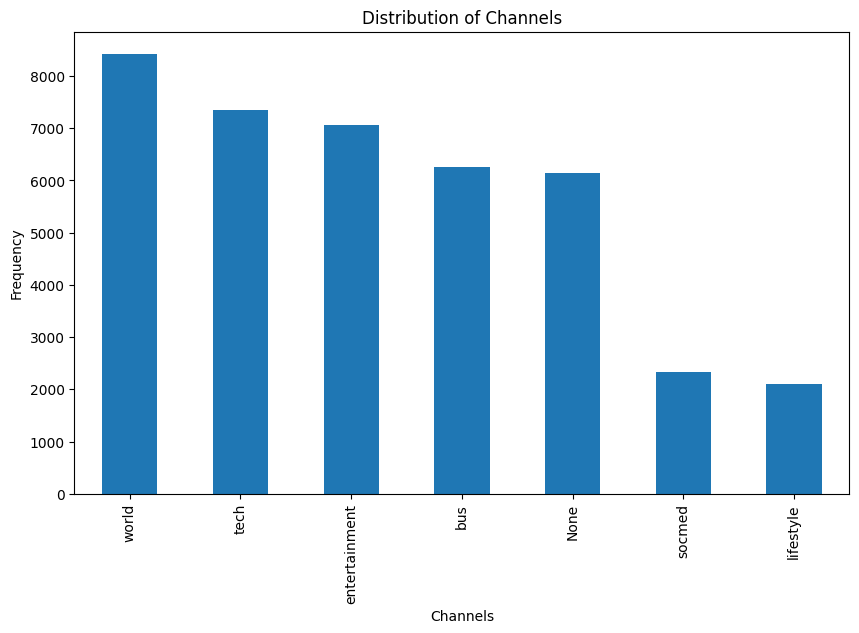

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the frequency of each channel
channel_counts = data_new['channel'].value_counts()

# Now plot the channel counts which are numeric
channel_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Channels')
plt.xlabel('Channels')
plt.ylabel('Frequency')
plt.show()

In [57]:
# Liste des colonnes des jours de la semaine
weekday_columns = ['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
                   'weekday_is_thursday', 'weekday_is_friday',
                   'weekday_is_saturday', 'weekday_is_sunday']

# Fonction pour combiner les jours
def combine_weekdays(row):
    # Créer une liste des jours où la valeur est 1
    weekdays = [day.replace('weekday_is_', '') for day in weekday_columns if row[day] == 1]

    # Si "is_weekend" est 1 et que samedi ou dimanche ne sont pas déjà listés
    if row['is_weekend'] == 1 and 'saturday' not in weekdays and 'sunday' not in weekdays:
        weekdays.append('weekend')

    return ', '.join(weekdays) if weekdays else 'None'

# Application de la fonction
data_new['weekday'] = data_new.apply(combine_weekdays, axis=1)
# Calculate the frequency of each channel
channel_counts = data_new['weekday'].value_counts()

# Now plot the channel counts which are numeric
channel_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Channels')
plt.xlabel('Channels')
plt.ylabel('Frequency')
plt.show()


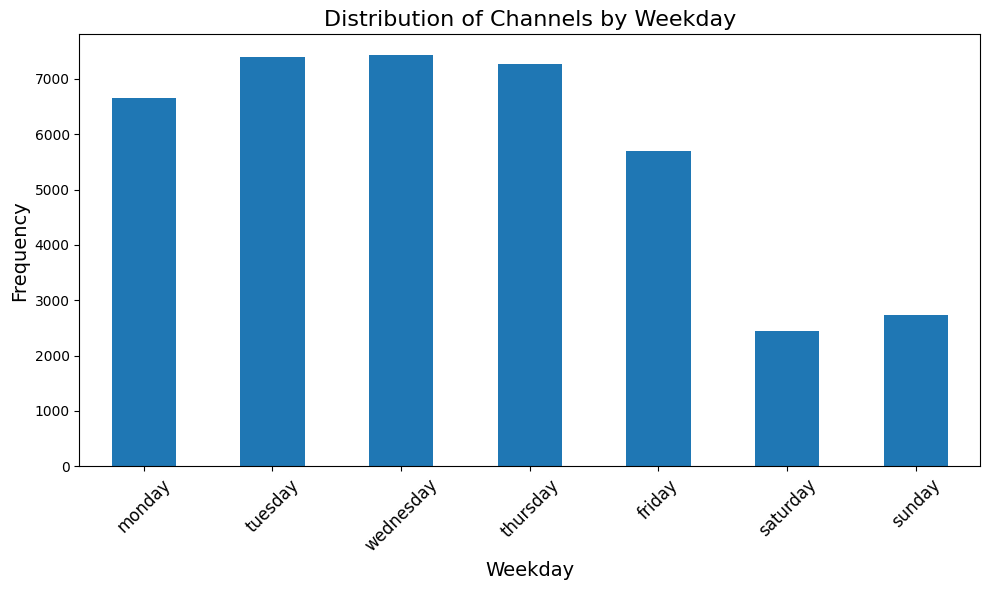

In [64]:
# Calculer la fréquence des jours et les ordonner
weekday_order = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
channel_counts = data_new['weekday'].value_counts()

# Réordonner les jours selon l'ordre défini
channel_counts = channel_counts.reindex(weekday_order, fill_value=0)

# Tracer le graphique des fréquences
channel_counts.plot(kind='bar', figsize=(10, 6), )
plt.title('Distribution of Channels by Weekday', fontsize=16)
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()


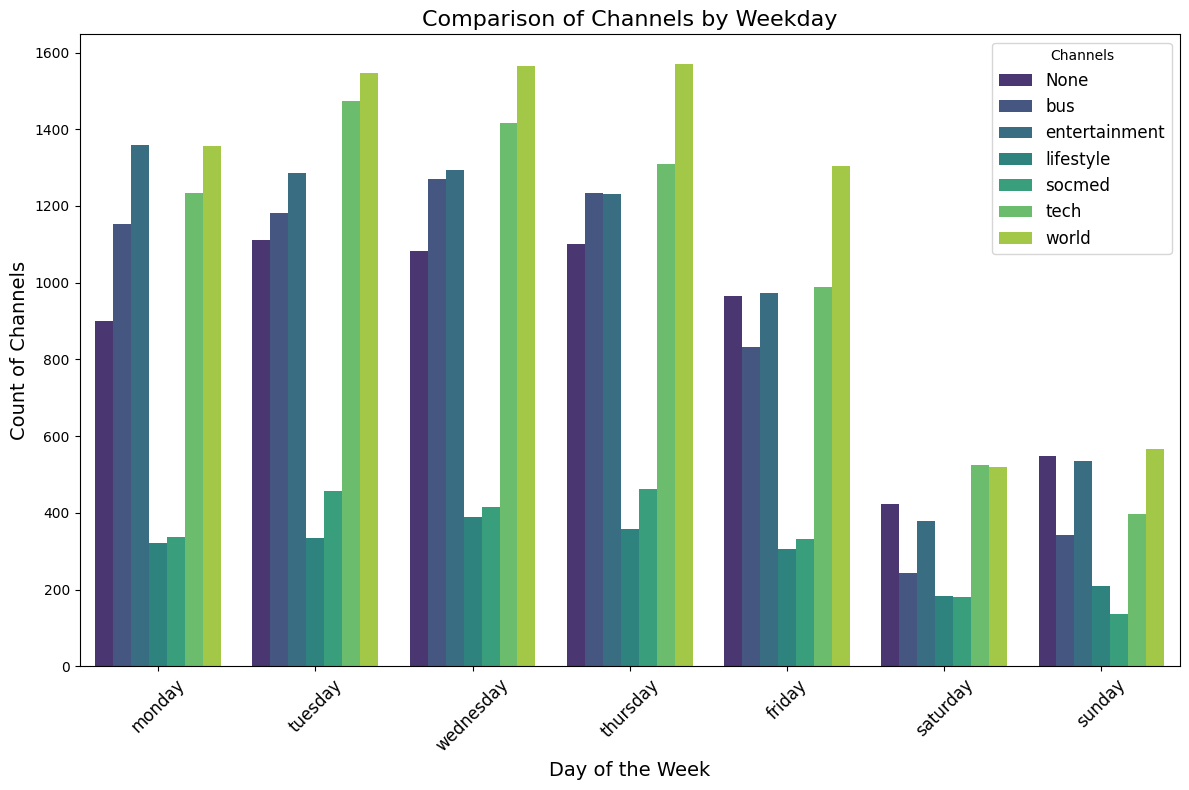

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Liste ordonnée des jours de la semaine
weekday_order = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

# Agrégation des données avec count
weekday_channel_counts = data_new.groupby(['weekday', 'channel']).size().reset_index(name='count')

# Assurez-vous que la colonne 'weekday' suit l'ordre spécifié
weekday_channel_counts['weekday'] = pd.Categorical(
    weekday_channel_counts['weekday'], categories=weekday_order, ordered=True
)

# Création du graphique avec les données agrégées
plt.figure(figsize=(12, 8))  # Taille du graphique

sns.barplot(x='weekday', y='count', hue='channel', data=weekday_channel_counts, palette='viridis')

# Ajout des titres et des labels
plt.title('Comparison of Channels by Weekday', fontsize=16)  # Titre du graphique
plt.xlabel('Day of the Week', fontsize=14)  # Label de l'axe X
plt.ylabel('Count of Channels', fontsize=14)  # Label de l'axe Y

# Rotation des étiquettes des jours de la semaine
plt.xticks(rotation=45, fontsize=12)

# Légende
plt.legend(title='Channels', fontsize=12)

# Ajustement des marges
plt.tight_layout()

# Affichage du graphique
plt.show()


<ipython-input-97-cc9c5dc09083>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


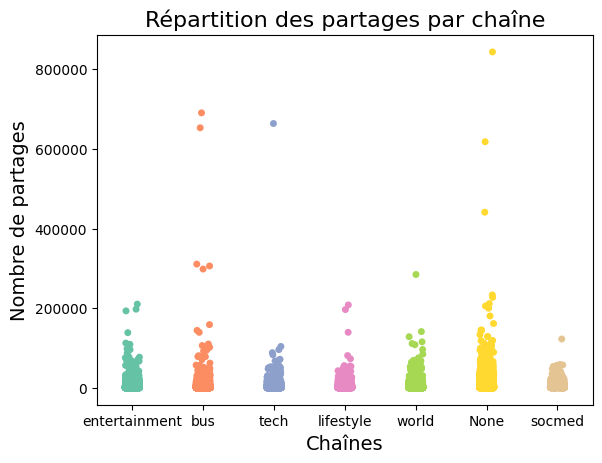

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création d'un stripplot pour visualiser les données
sns.stripplot(
    x='channel',
    y='shares',
    data=data_new,
    palette='Set2'
)

# Ajout du titre du graphique
plt.title('Répartition des partages par chaîne', fontsize=16)  # Nouveau titre

# Ajout des labels des axes
plt.xlabel('Chaînes', fontsize=14)  # Nouveau label pour l'axe X
plt.ylabel('Nombre de partages', fontsize=14)  # Nouveau label pour l'axe Y

# Affichage du graphique
plt.show()


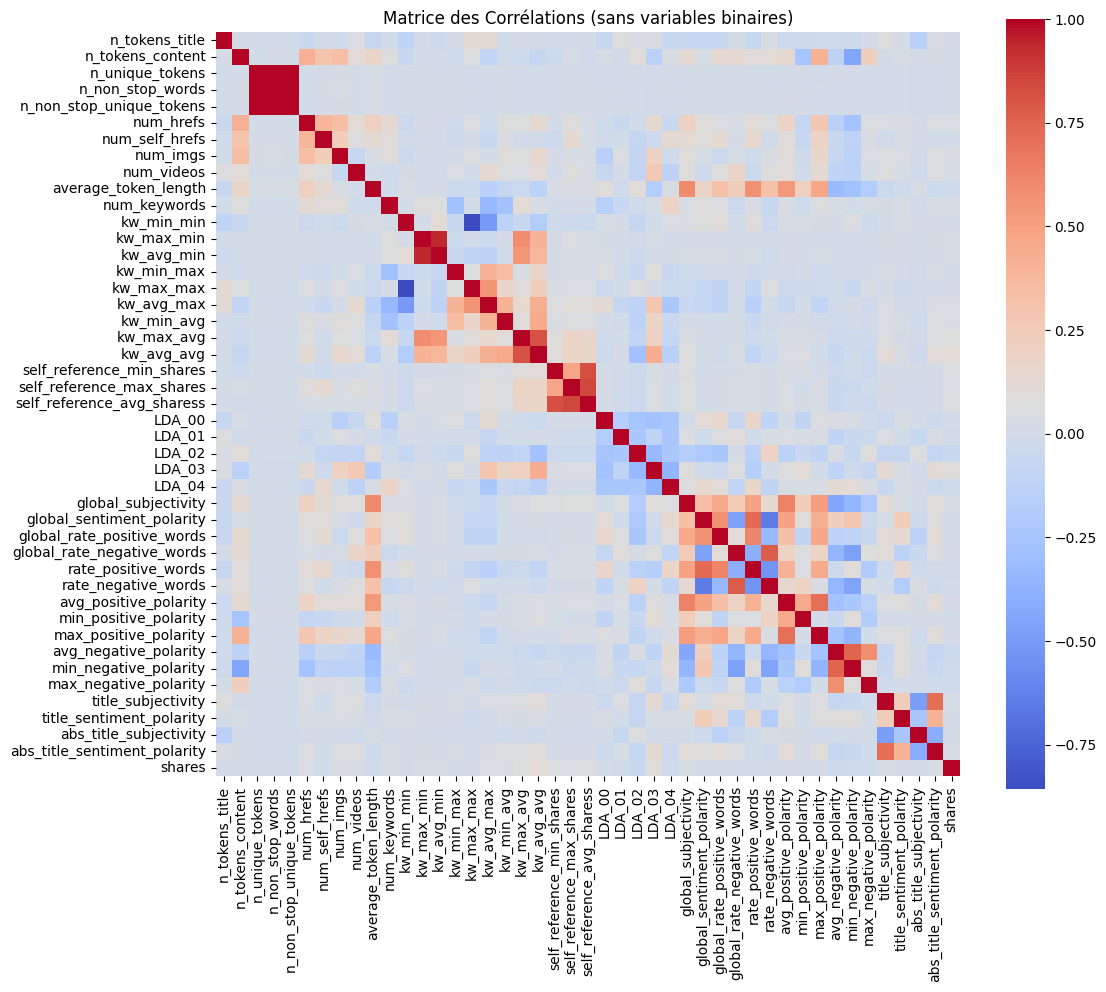

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identification des colonnes numériques uniquement
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Suppression des colonnes non pertinentes comme 'timedelta', ou toute autre variable qualitative
filtered_data = data[numeric_columns].drop(['timedelta'], axis=1)

# Filtrage des variables binaires (nombre de valeurs uniques <= 2)
non_binary_columns = [col for col in filtered_data.columns if data[col].nunique() > 2]

# Création d'un sous-ensemble sans variables binaires
filtered_data_no_binary = filtered_data[non_binary_columns]

# Calcul des corrélations entre toutes les variables restantes
correlation_matrix = filtered_data_no_binary.corr()

# Heatmap des corrélations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Matrice des Corrélations (sans variables binaires)")
plt.show()



### **Description de la variable cible**


In [66]:
# Description de la variable cible
data['shares'].describe()

,shares
count,39644.000000
mean,3395.380184
std,11626.950749
min,1.000000
25%,946.000000
50%,1400.000000
75%,2800.000000
max,843300.000000


Text(0.5, 1.0, 'Boxplot de la variable cible')

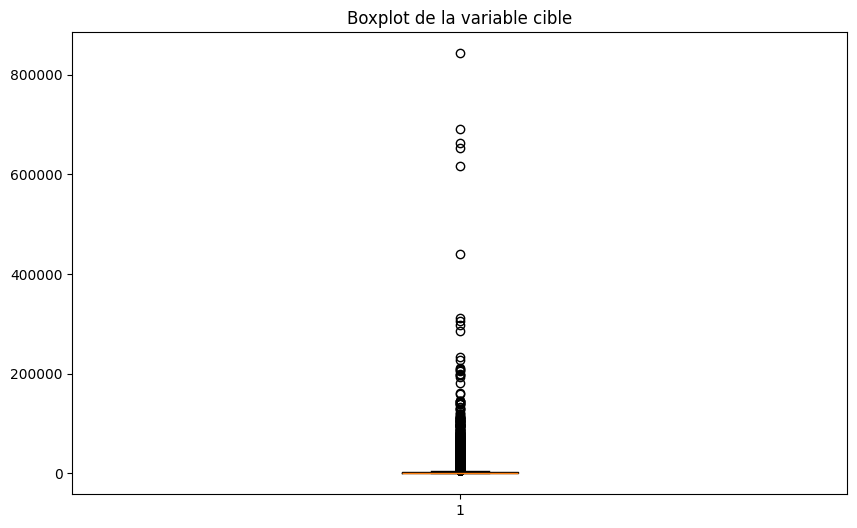

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.boxplot(data['shares'])
plt.title('Boxplot de la variable cible')

In [86]:
# Identification des colonnes numériques uniquement
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Suppression des colonnes non pertinentes comme 'url', 'timedelta'
filtered_data = data[numeric_columns].drop(['timedelta'], axis=1)

# Calcul des corrélations avec la variable cible 'shares'
correlations = filtered_data_no_binary.corr()['shares'].dropna().sort_values(ascending=False)[1:]

# Affichage des corrélations
correlations.head()


,shares
kw_avg_avg,0.110413
LDA_03,0.083771
kw_max_avg,0.064306
self_reference_avg_sharess,0.057789
self_reference_min_shares,0.055958


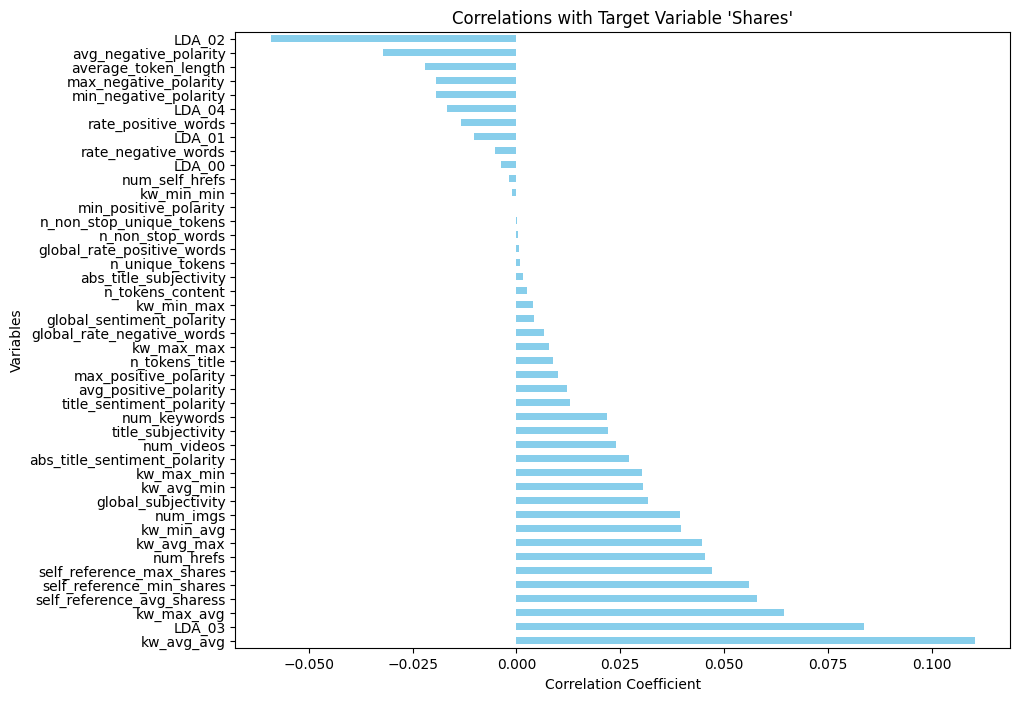

In [89]:
import matplotlib.pyplot as plt

# Créer un graphique en barres horizontales
plt.figure(figsize=(10, 8))
correlations.plot(kind='barh', color='skyblue')
plt.title("Correlations with Target Variable 'Shares'")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Variables")
plt.show()


# 2.   **Prédiction**



In [ ]:
pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.0 MB/s eta 0:00:00


In [13]:
# prompt: randomforest classification

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import umap
from sklearn.metrics import accuracy_score

# Convertir la variable cible 'shares' en une variable catégorielle (par exemple, en classes de popularité)
bins = [0,  1400, float('inf')]
labels = ['Pas_Populaire', 'Populaire']
data['popularity'] = pd.cut(data['shares'], bins=bins, labels=labels)




ModuleNotFoundError: No module named 'umap'

In [ ]:
# Analyse de la variable cible
sns.countplot(x='popularity', data=df)
plt.title("Répartition des classes cibles (populaires vs non populaires)")
plt.show()


In [ ]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Suppression de la colonne 'shares' (car redondante avec 'popularity')
df = df.drop(columns=['shares'])

# Identification des colonnes binaires et quantitatives
binary_columns = [col for col in df.columns if df[col].nunique() == 2]
quantitative_columns = [col for col in df.columns if col not in binary_columns + ['popularity']]

print("Colonnes binaires :", binary_columns)
print("Colonnes quantitatives :", quantitative_columns)

# Division des données en X et y
X = df.drop(columns=['popularity'])
y = df['popularity']

# Division en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation uniquement des variables quantitatives avec StandardScaler
scaler = StandardScaler()
X_train_quantitative = scaler.fit_transform(X_train[quantitative_columns])
X_test_quantitative = scaler.transform(X_test[quantitative_columns])

# Reconstruction des datasets avec les colonnes binaires intactes
X_train_scaled = pd.DataFrame(X_train_quantitative, columns=quantitative_columns, index=X_train.index)
X_train_scaled[binary_columns] = X_train[binary_columns]

X_test_scaled = pd.DataFrame(X_test_quantitative, columns=quantitative_columns, index=X_test.index)
X_test_scaled[binary_columns] = X_test[binary_columns]

# Aperçu des données normalisées
print("Données normalisées (entraînement) :")
print(X_train_scaled.head())


In [ ]:
# Importation des bibliothèques nécessaires
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from umap import UMAP
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Fonction pour entraîner et évaluer un modèle
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)  # Prédictions sur le jeu de test
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1, y_pred  # Retourne aussi y_pred pour l'affichage

# On définit les modèles à évaluer
models = [KNeighborsClassifier(), RandomForestClassifier(), SVC()]

# On définit les méthodes de réduction de dimension
dimension_reduction_methods = [None, PCA(n_components=0.95), UMAP(n_components=10)]

# Boucle pour évaluer les modèles avec les différentes méthodes de réduction de dimension
for model in models:
    for method in dimension_reduction_methods:
        # Copie des données pour éviter de modifier les données originales
        X_train_reduced = X_train.copy()
        X_test_reduced = X_test.copy()

        if method is not None:
            method.fit(X_train)
            X_train_reduced = method.transform(X_train)
            X_test_reduced = method.transform(X_test)

        accuracy, precision, recall, f1, y_pred = evaluate_model(model, X_train_reduced, y_train, X_test_reduced, y_test)
        print(f"Model: {type(model).__name__}, Dimension Reduction: {type(method).__name__ if method else 'None'}")
        # Affichage des résultats détaillés
        print("\nClassification Report:\n", classification_report(y_test, y_pred))
        print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
        print("-" * 50)


Model: KNeighborsClassifier, Dimension Reduction: None

Classification Report:
                precision    recall  f1-score   support

Pas_Populaire       0.58      0.59      0.58      4075
    Populaire       0.56      0.55      0.55      3854

     accuracy                           0.57      7929
    macro avg       0.57      0.57      0.57      7929
 weighted avg       0.57      0.57      0.57      7929


Confusion Matrix:
 [[2395 1680]
 [1737 2117]]
--------------------------------------------------
Model: KNeighborsClassifier, Dimension Reduction: PCA

Classification Report:
                precision    recall  f1-score   support

Pas_Populaire       0.56      0.56      0.56      4075
    Populaire       0.53      0.52      0.53      3854

     accuracy                           0.54      7929
    macro avg       0.54      0.54      0.54      7929
 weighted avg       0.54      0.54      0.54      7929


Confusion Matrix:
 [[2300 1775]
 [1839 2015]]
------------------------------

# **3. Sélection et influence des variables**

In [ ]:
def identify_variable_types(df):
    quantitative_variables = []
    binary_variables = []

    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            if df[col].nunique() == 2:  # Check for binary variables
                binary_variables.append(col)
            else:
                quantitative_variables.append(col)
        # Add more checks for other variable types if needed
        # e.g., categorical variables, date variables, etc.

    return {
        "quantitative": quantitative_variables,
        "binary": binary_variables
    }

variable_types = identify_variable_types(X)

print("Quantitative Variables:", variable_types["quantitative"])
print("Binary Variables:", variable_types["binary"])

Quantitative Variables: ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity']
Binary Variables: ['data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channe

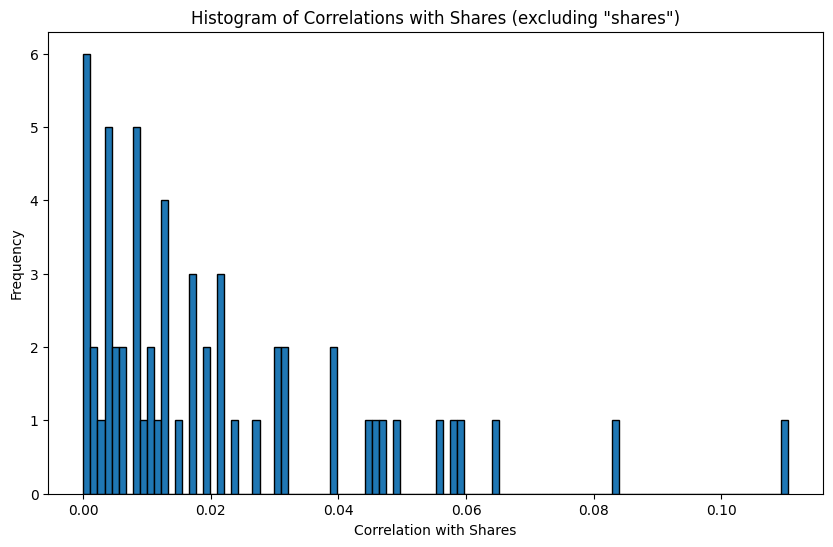

In [ ]:

import matplotlib.pyplot as plt

varlist = X.var()
# Selection des variables
variables = data.drop(['popularite', 'shares'], axis=1).columns

# Creation de matrice de correlation
correlation_matrix = data[variables].corr()

# Calculate correlation with 'shares' for each variable
correlations_with_shares = abs(data.drop('popularite', axis=1).corr()['shares'])

# Create the histogram for correlation with 'shares'
plt.figure(figsize=(10, 6))
plt.hist(correlations_with_shares.drop('shares'), bins=100, edgecolor='black')  # Exclude self-correlation
plt.xlabel('Correlation with Shares')
plt.ylabel('Frequency')
plt.title('Histogram of Correlations with Shares (excluding "shares")')
plt.show()

In [ ]:
# prompt: donne moi un code je veux garder les variables avec une correlation de 0.04 et une variance superieur a 1

# Filter variables based on correlation and variance
threshold_correlation = 0.04
threshold_variance = 1

selected_variables = []
for col in variables:
    if abs(correlations_with_shares[col]) >= threshold_correlation and varlist[col] >= threshold_variance:
        selected_variables.append(col)

print("Selected variables:", selected_variables)

# Create a new DataFrame with the selected variables
selected_data = data[selected_variables + ['shares', 'popularite']]

print(selected_data.head())

Selected variables: ['num_hrefs', 'kw_avg_max', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess']
   num_hrefs  kw_avg_max  kw_max_avg  kw_avg_avg  self_reference_min_shares  \
0        4.0         0.0         0.0         0.0                      496.0   
1        3.0         0.0         0.0         0.0                        0.0   
2        3.0         0.0         0.0         0.0                      918.0   
3        9.0         0.0         0.0         0.0                        0.0   
4       19.0         0.0         0.0         0.0                      545.0   

   self_reference_max_shares  self_reference_avg_sharess  shares  \
0                      496.0                  496.000000     593   
1                        0.0                    0.000000     711   
2                      918.0                  918.000000    1500   
3                        0.0                    0.000000    1200   
4                    

In [ ]:

from sklearn.linear_model import LogisticRegressionCV
from sklearn import preprocessing

# Assuming X_train, X_test, y_train, y_test are already defined as in your previous code
X = selected_data.drop(['popularite','shares'], axis=1)
y = selected_data['popularite']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Get the quantitative variables that are actually present in X_train
# This ensures you are selecting existing columns
available_quantitative_vars = [var for var in variable_types["quantitative"] if var in X_train.columns]

# Scale the features using StandardScaler with the available quantitative variables
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train[available_quantitative_vars])
X_test = scaler.transform(X_test[available_quantitative_vars])


# Initialize and train LogisticRegressionCV
logreg_cv = LogisticRegressionCV(cv=5,penalty="l1",solver='liblinear',max_iter=100, random_state=42) # cv: number of cross-validation folds
logreg_cv.fit(X_train, y_train)


# Make predictions on the test set
y_pred_logregcv = logreg_cv.predict(X_test)

# Evaluate the model
accuracy_logregcv = accuracy_score(y_test, y_pred_logregcv)
print(f"LogisticRegressionCV Accuracy: {accuracy_logregcv}")
print(classification_report(y_test, y_pred_logregcv))
print(confusion_matrix(y_test, y_pred_logregcv))

LogisticRegressionCV Accuracy: 0.6153361079581284
               precision    recall  f1-score   support

Pas_Populaire       0.61      0.70      0.65      4075
    Populaire       0.62      0.53      0.57      3854

     accuracy                           0.62      7929
    macro avg       0.62      0.61      0.61      7929
 weighted avg       0.62      0.62      0.61      7929

[[2847 1228]
 [1822 2032]]
